# Рабочая тетрадь №4. Основы Phyton. Библиотеки
###  Алхимов Василий Юрьевич

Регрессия – это зависимость среднего значения какой-либо величины от некоторой другой величины или от нескольких других величин. В отличие от чисто функциональной зависимости y=f(x), когда каждому значению независимой переменной x соответствует одно определённое значение зависимой переменной у, при регрессионной связи одному и тому же значению независимой переменной (фактору) x могут соответствовать в зависимости от конкретного случая различные значения зависимой переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и Y связаны между собой вероятностной зависимостью: при каждом конкретном значении X=x величина Y является случайной величиной с вполне определённым распределением вероятностей. Зависимость зависимой переменной – отклика от одной независимой переменной – фактора или нескольких факторов называется уравнением регрессии. По количеству факторов выделяют парную (однофакторную) и множественную (многофакторную) регрессию. Для парной будем рассматривать следующие методы регрессии: линейную, показательную, экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики, изучающий регрессионную зависимость между случайными величинами по статистическим данным. Цель регрессионного анализа состоит в определении общего вида уравнения регрессии, вычислении оценок неизвестных параметров, входящих в уравнение регрессии проверке статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических методов исследования влияния одной или нескольких независимых переменных X_1,…,X_n на зависимую переменную Y. Независимые переменные иначе называют регрессорами или предикторами, а зависимые переменные – критериальными переменными.

### 1.1. Теоретический материал – Линейные регрессионные модели
[Корреляция и регрессия](https://biconsult.ru/services/korrelyaciya-i-regressiya)

Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть f (x) = b +m⋅x, где m – наклон линии, а b – его сдвиг.

#### Функция потерь — метод наименьших квадратов

Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением.

Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:

#### numpy - numpy.linalg.lstsq
***scipy - scipy.linalg*** (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).

### 1.1.1 Пример

Задача:

Проведем прямую y = mx + b  через экспериментальные точки.

In [5]:
import numpy as np
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

#Перепишите линейное уравнение y = mx + c как y = Ap, где A = [[x1]] и p = [[m],[c]]
# Построим A по x:
A = np.vstack([x,np.ones(len(x))]).T# Транспонированный массив(заменас строк на столбцы).

# Возвращает новый массив заданной формы и типа, заполненный единицами.
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
#Используя метод lstsq для решения его относительно вектора p.
m,c = np.linalg.lstsq(A,y,rcond = None)[0]
print(m,c)

0.9999999999999999 -0.9499999999999997


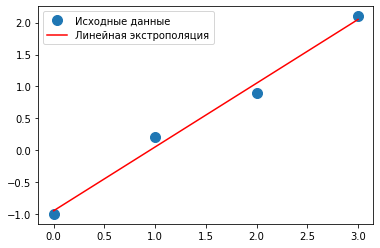

In [3]:
#Построить график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x,y,'o',label='Исходные данные',markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстрополяция')
plt.legend()
plt.show()

### 1.1.2 Пример
Задача:
Пусть x,y – вектора длиной n > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома a,b,c по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

In [11]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
#Return evenly spaced numbers over a specified interval.
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
#заисываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

#читаем данные из файлов
x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('x_data.txt', float, sep = '\n')

print(x)
print(y)

[-4.98279574 -3.53033491 -3.3586374  -2.36311043 -0.77397684 -0.24435112
  0.55497978  1.9754518   2.90909769  3.76760864  4.78816276]
[-4.98279574 -3.53033491 -3.3586374  -2.36311043 -0.77397684 -0.24435112
  0.55497978  1.9754518   2.90909769  3.76760864  4.78816276]


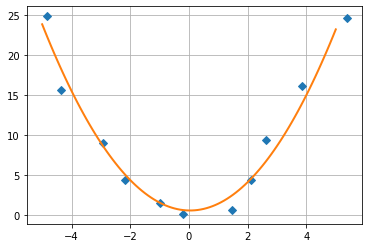

In [19]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
#Return evenly spaced numbers over a specified interval.
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
#Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
#задаем вектор m = [x**2, x, E]
m = vstack((x**2, x,ones(11))).T
#Находим коффициенты при составляющих вектора m
s = np.linalg.lstsq(m,y,rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5,5,101)
#рисуем точки
plt.plot(x,y,'D')
#рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0],s[1],s[2]
plt.plot(x_prec,s[0] * x_prec**2 + s[1] * x_prec+s[2],'-',lw = 2)
plt.grid()
plt.savefig('парабола.png')

### 1.1.3 Пример
Задача:

По данным предыдущего примера постройте эстраполяционного полинома третьего порядка

Решение:

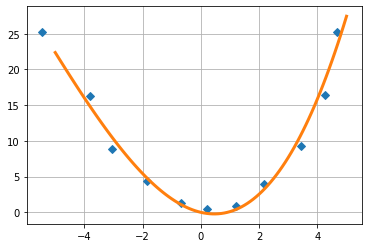

In [18]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
#numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
#Return evenly spaced numbers over a specified interval.
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
#Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m,y,rcond = None)[0]

# от отрезке [-5,5]
x_prec = linspace(-5,5,101)
# рисуем точки
plt.plot(x,y,'D')
# рисуем кривую вида y = ax^3 + bx^2 +cx +d, подставляя из решения коэффициенты s[0],s[1],s[2],s[3]
plt.plot(x_prec,s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]* x_prec + s[3],'-',lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

Задание:

Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

Решение:

0.5825771324863886 -6.297640653357531


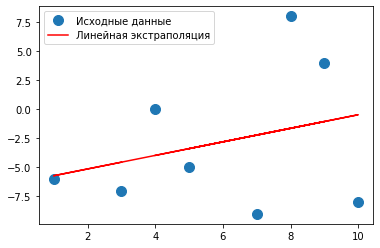

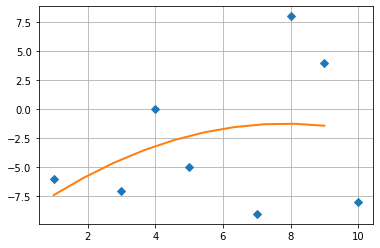

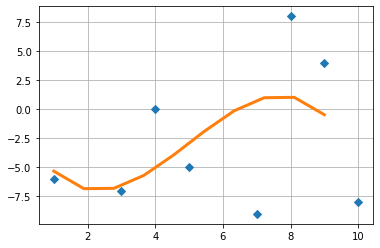

In [20]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([4,9,5,10,7,8,1,3])
y = np.array([0,4,-5,-8,-9,8,-6,-7])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()


m = np.vstack((x ** 2, x, np.ones(8))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(1, 9, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
plt.show()

m = np.vstack((x ** 3, x ** 2, x, np.ones(8))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(1, 9, 10)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 3)
plt.grid()
plt.show()


### 1.1.4 Пример
Задача:

Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида f(x,b) = b0 + b1exp(-b2x^2)

Решение

In [16]:
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
import numpy as np
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
import scipy.optimize as sp
beta_opt, beta_cov = sp.curve_fit(f, xdata, ydata)
print(xdata)
print(ydata)
beta_opt

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.03325945 1.03303998 1.02937687 0.99082172 0.98498746 0.9260308
 0.87219141 0.87219466 0.80256161 0.78738459 0.7150428  0.65772841
 0.61839164 0.59240301 0.55991523 0.49934638 0.45092401 0.46156886
 0.39860565 0.38841963 0.37981225 0.35652418 0.33388152 0.32548514
 0.32883805 0.28531631 0.32023439 0.27567241 0.29346894 0.26055115
 0.28849773 0.26132993 0.27981796 0.27262185 0.28270501 0.30121932
 0.26916489 0.27707784 0.26570606 0.259

array([0.27483874, 0.75673927, 0.50738625])

In [19]:
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

1.7933540792978967e-05
0.009303622498177162


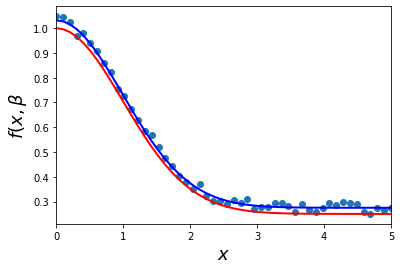

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y,'r',lw =2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta$", fontsize = 18)
plt.show()

### 1.1.5 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:

1) f(x,b) = b_0  + b_1 x

2) f(x,b) = b_0  + b_1 x + b_2 x^2

3) f(x,b) = b_0  + b_1 ln(x)

4) f(x,b) = b_0   x^(b_1 )

Решение:

[0.25011203 0.74697813]
0.00011054345826937028
0.09720200679453139


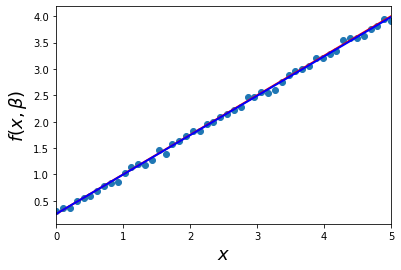

In [4]:
#решение
#1
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sp
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25,0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоритически правильные значения точек yi (без шума)

y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линенйое отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.25821683 0.74931081 0.4996024 ]
Линейное отклонение:  0.00010809065057298709
Квадратичное отклонение:  0.09013628914803366


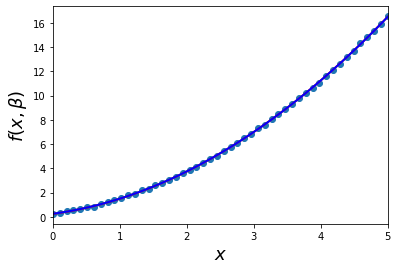

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sp
#решение 2
#добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print("Линейное отклонение: ", lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print("Квадратичное отклонение: ", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

[1.00479238 1.99225734]
Линейное отклонение:  6.704057312508286e-05
Квадратичное отклонение:  0.1550273903379614


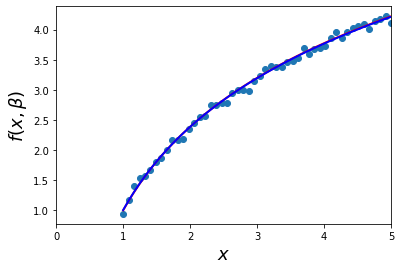

In [7]:
#решение 3
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as sp
#добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)

def f(x, b0, b1):
    return b0 + b1 * np.log(x)

#зададим массив точек xi
xdata = np.linspace(1, 5, 50)

#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.curve_fit(f, xdata, ydata)
print(beta_opt)

#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print("Линейное отклонение: ", lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print("Квадратичное отклонение: ", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

[1.00693037 1.99486861]
Линейное отклонение:  3.2852400704392393e-06
Квадратичное отклонение:  0.0762295644580591


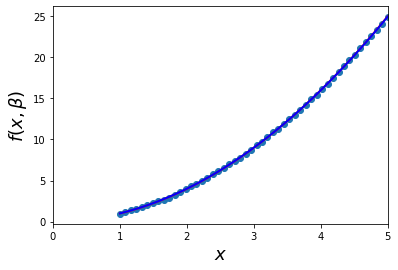

In [8]:
#решение 4
from scipy.optimize import curve_fit

#добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)

def f(x, b0, b1):
    return b0 * x ** b1

#зададим массив точек xi
xdata = np.linspace(1, 5, 50)

#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)

#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print("Линейное отклонение: ", lin_dev)

#вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print("Квадратичное отклонение: ", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

### Задание:
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

Линейное отклонение:  3.453495167955334e-07
Квадратичное отклонение:  2.3610316964088645


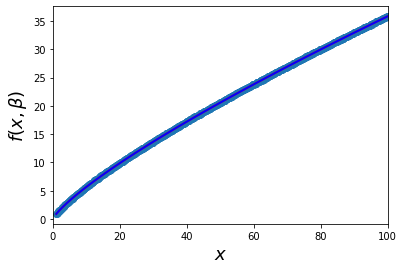

In [19]:
from scipy.optimize import curve_fit

beta = (0.9, 0.8)

def f(x, b0, b1):
    return b0 * x ** b1

xdata = np.linspace(1, 100, 1000)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)

lin_dev = sum(beta_cov[0])
print("Линейное отклонение: ", lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print("Квадратичное отклонение: ", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 100)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

## Задачи регрессии
<p><strong>Линейная регрессия</strong> - это широко используемый метод
статистического анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или более
переменными. Если регрессионный анализ включает две или более независимых
переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

### 1.2.1 Пример

Задача:

Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.887500,53.700000
std,1.501041,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.875000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


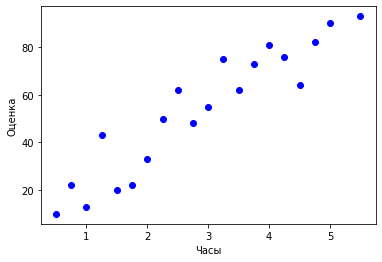

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {"Учебное время": [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50,
                             3.75, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
          "Оценка": [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
display(dataset.head())

#исследуем набор данных
print(dataset.shape)
display(dataset.describe())

#нарисуем точечную диаграмму
plt.scatter(dataset["Учебное время"], dataset["Оценка"], color = 'b', label = "Данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

#теперь, когда у нас есть атрибуты и метки, необходимо разделить их наобучающий и тестовый набор
#приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#далее можно обучить алгоритм линейной регрессии
#необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#приведем получившиеся коэффициенты для линии регрессии
print("\n Linear Regression")
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]

 Linear Regression
3.168632075471699
[17.18867925]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

,Actual,Predicted
0,90,89.112028
1,22,16.060142
2,93,97.706368
3,62,46.140330


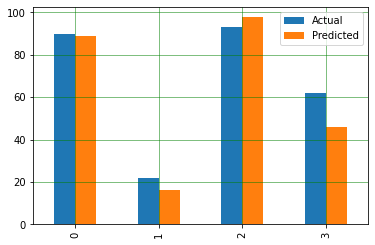

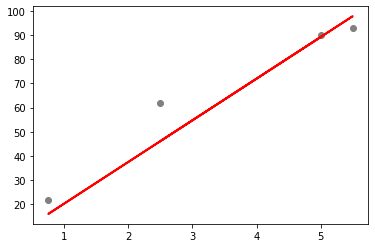

In [14]:
y_pred = regressor.predict(X_test)

#сравним фактические значения с прогнозируемыми
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display(df)

#визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

<strong>1.2.2 Задание </strong> Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

,Actual,Predicted
0,73,67.765517
1,50,44.158621
2,22,36.289655
3,10,16.617241


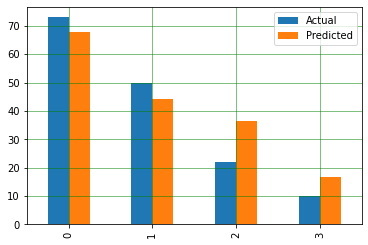

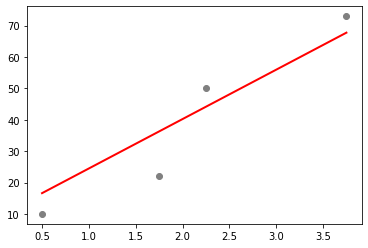

Коэффициенты линии регрессии:
8.748275862068951
[15.73793103]


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'

dataframe = pd.read_csv(url)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.20
)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#сравним фактические значения с прогнозируемыми
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display(df)

#визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

print('Коэффициенты линии регрессии:')
print(regressor.intercept_)
print(regressor.coef_)

### 1.3 Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой. Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

<strong>1.3.1 Пример </strong> Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

In [39]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


<strong>1.3.2 Пример </strong> Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

#формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis = 1, join='inner')
display(dataset.head())

#изучим данные
display(dataset.shape)
display(dataset.describe())

#разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

#разделим данные на обучающую и текстовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
display(coeff_df)

#чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df)

#последний шаг - оценить производительность алгоритма; мы сделаем это, найдя значения для MSE
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


(23, 4)

,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


Mean Squared Error:  1.3272699242343065


<strong>1.3.3 Задание </strong> Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.
<ol>
<li>https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv</li>
<li>https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv</li>
</ol>

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url1 = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
url2 = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

dataset1 = pd.read_csv(url1)
dataset2 = pd.read_csv(url2)

X_train1, X_test1, y_train1, y_test1 = train_test_split(dataset1.iloc[:, :-1],
                                                        dataset1.iloc[:, -1],
                                                        test_size=0.2,
                                                        random_state=0)

X_train2, X_test2, y_train2, y_test2 = train_test_split(dataset2.iloc[:, :-1],
                                                        dataset2.iloc[:, -1],
                                                        test_size=0.2,
                                                        random_state=0)

regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

y_pred1 = regressor1.predict(X_test1)
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
display(df1)

y_pred2 = regressor2.predict(X_test2)
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
display(df2)

print('Mean Squared Error first csv: ', metrics.mean_squared_error(y_test1, y_pred1))
print('Mean Squared Error second csv: ', metrics.mean_squared_error(y_test2, y_pred2))


,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


Mean Squared Error first csv:  4666.344787588363
Mean Squared Error second csv:  0.38447119782012457


<p><strong>1.3.4 Задание </strong> Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.</p>

<p>Вариант №6.<br>
x = [4.0, 4.2, 4.4, 4.6, 4.8, 5.0]<br>
y = [4.0, 3.0, 6.0, 6.0, 4.0, 4.0]</p>

[[4.  1. ]
 [4.2 1. ]
 [4.4 1. ]
 [4.6 1. ]
 [4.8 1. ]
 [5.  1. ]]
0.42857142857142755 2.5714285714285756


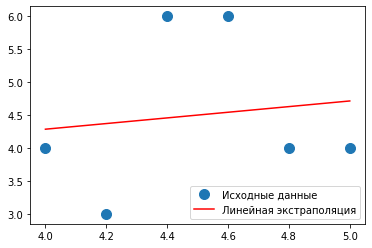

[  -6.69642857   60.69642857 -132.25      ]


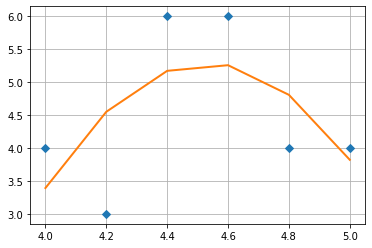

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4.0, 4.2, 4.4, 4.6, 4.8, 5.0])
y = np.array([4.0, 3.0, 6.0, 6.0, 4.0, 4.0])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

m = np.vstack((x ** 2, x, np.ones(6))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(4, 5, 6)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
print(s)